## To-Do List
1. Plot shape graph of London Boroughs and what label they are given. Look in the lab for details.

## Import

In [123]:
import numpy as np
import pandas as pd
from geopy import Nominatim
import requests
import cycler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
#from google.colab import drive
#drive.mount('/content/gdrive')
#! pip install geocoder

## Geocoding London Boroughs
Here I geocode all London Boroughs before making a dataframe consisting of the name of the london borough, the latitude, and the longitude.

In [3]:
lon_bor = [
"Barking and Dagenham"
,"Barnet"
,"Bexley"
,"Brent"
,"Bromley"
,"Camden"
,"Croydon"
,"Ealing"
,"Enfield"
,"Greenwich"
,"Hackney"
,"Hammersmith and Fulham"
,"Haringey"
,"Harrow"
,"Havering"
,"Hillingdon"
,"Hounslow"
,"Islington"
,"Kensington and Chelsea"
,"Kingston upon Thames"
,"Lambeth"
,"Lewisham"
,"Merton"
,"Newham"
,"Redbridge"
,"Richmond upon Thames"
,"Southwark"
,"Sutton"
,"Tower Hamlets"
,"Waltham Forest"
,"Wandsworth"
,"Westminster"]

In [10]:
location, latitude, longitude = [], [], []
for london_borough in lon_bor:
    geolocator = Nominatim(user_agent="lon_explorer")
    location = geolocator.geocode(london_borough + ' London, UK')
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    print(f"Completed {london_borough}...")

Completed Barking and Dagenham...
Completed Barnet...
Completed Bexley...
Completed Brent...
Completed Bromley...
Completed Camden...
Completed Croydon...
Completed Ealing...
Completed Enfield...
Completed Greenwich...
Completed Hackney...
Completed Hammersmith and Fulham...
Completed Haringey...
Completed Harrow...
Completed Havering...
Completed Hillingdon...
Completed Hounslow...
Completed Islington...
Completed Kensington and Chelsea...
Completed Kingston upon Thames...
Completed Lambeth...
Completed Lewisham...
Completed Merton...
Completed Newham...
Completed Redbridge...
Completed Richmond upon Thames...
Completed Southwark...
Completed Sutton...
Completed Tower Hamlets...
Completed Waltham Forest...
Completed Wandsworth...
Completed Westminster...


In [3]:
# Bring these lat lons into a dataframe
#df = pd.DataFrame(zip(lon_bor, latitude, longitude), columns = ['London Borough', 'Latitude', 'Longitude'])

df = pd.read_csv('df.csv')

In [4]:
df.head()

,Unnamed: 0,London Borough,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino
0,0,Barking and Dagenham,51.554117,0.150504,3,0,1,0,1,9,0,9,0,4,0,3,6,2,0
1,1,Barnet,51.648784,-0.172913,4,0,0,0,3,15,0,2,0,7,0,7,5,0,0
2,2,Bexley,51.441679,0.150488,1,1,1,0,0,3,0,1,0,0,1,8,3,0,0
3,3,Brent,51.584778,-0.299180,4,0,1,0,1,16,0,8,1,4,0,5,11,0,0
4,4,Bromley,51.402805,0.014814,7,0,1,0,3,31,0,5,6,9,0,22,13,1,2


## Foursquare API Category
Below I'm using the Foursquare API to look up the total number of different kind of venues which exist within 1 kilometre of a London Borough's central point.

In [26]:
CLIENT_ID = '0RPHAM3MZJEDE2PJXIDY0RUG2QQBPLOYKMMZBAP1TMY4FRCJ' # your Foursquare ID
CLIENT_SECRET = 'UPZWKAVRTMJN3VO52TB24RRA5YHXG2APV5UM13BJBES5XUYR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 5000
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0RPHAM3MZJEDE2PJXIDY0RUG2QQBPLOYKMMZBAP1TMY4FRCJ
CLIENT_SECRET:UPZWKAVRTMJN3VO52TB24RRA5YHXG2APV5UM13BJBES5XUYR


In [0]:
# Defining a function for getting venue category data
def get_categories(CATEGORY, CATEGORY_ID, df = df):
    list_of_category_counts = []
    for latitude, longitude in zip(df['Latitude'], df['Longitude']):
        url = f'https://api.foursquare.com/v2/venues/search?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&ll={latitude},{longitude}&v={VERSION}&categoryId={CATEGORY_ID}&radius={radius}&limit={LIMIT}'
        results = requests.get(url).json()
        display(results['response'])
        list_of_category_counts.append(len(results['response']['venues']))
        df[CATEGORY] = pd.Series(list_of_category_counts)

In [0]:
# Getting venue category data
get_categories("Parks", "4bf58dd8d48988d163941735")
get_categories("Museum", "4bf58dd8d48988d181941735")
get_categories("Library", "4bf58dd8d48988d12f941735")
get_categories("Public Bathroom", "5744ccdfe4b0c0459246b4c4")
get_categories("Post Office", "4bf58dd8d48988d172941735")
get_categories("Travel & Transport", "4d4b7105d754a06379d81259")
get_categories("Hospital", "4bf58dd8d48988d196941735")
get_categories("School", "4bf58dd8d48988d13b941735")
get_categories("Bookstore", "4bf58dd8d48988d114951735")
get_categories("Gym / Fitness Center", "4bf58dd8d48988d175941735")
get_categories("Farm", "4bf58dd8d48988d15b941735")
get_categories("Bar", "4bf58dd8d48988d116941735")
get_categories("Place of Worship", "4bf58dd8d48988d131941735")
get_categories("ATM", "52f2ab2ebcbc57f1066b8b56")
get_categories("Casino", "4bf58dd8d48988d17c941735")
get_categories("Lake", "4bf58dd8d48988d161941735")
get_categories("Cultural Center", "52e81612bcbc57f1066b7a32")
get_categories("Movie Theater", "4bf58dd8d48988d17f941735")
get_categories("Music Venue", "4bf58dd8d48988d1e5931735")
get_categories("Public Art", "507c8c4091d498d9fc8c67a9")
get_categories("River", "4eb1d4dd4b900d56c88a45fd")
get_categories("Record Shop", "4bf58dd8d48988d10d951735")
get_categories("Art Gallery", "4bf58dd8d48988d1e2931735")
get_categories("Shopping Mall", "4bf58dd8d48988d1fd941735")
get_categories("Place of Worship", "4bf58dd8d48988d131941735")
get_categories("ATM", "52f2ab2ebcbc57f1066b8b56")
get_categories("Casino", "4bf58dd8d48988d17c941735")
get_categories("Cultural Center", "52e81612bcbc57f1066b7a32")
get_categories("Movie Theater", "4bf58dd8d48988d17f941735")
get_categories("Music Venue", "4bf58dd8d48988d1e5931735")
get_categories("Public Art", "507c8c4091d498d9fc8c67a9")
get_categories("River", "4eb1d4dd4b900d56c88a45fd")
get_categories("Record Shop", "4bf58dd8d48988d10d951735")
get_categories("Art Gallery", "4bf58dd8d48988d1e2931735")
get_categories("Shopping Mall", "4bf58dd8d48988d1fd941735")

In [4]:
# Save/Load dataframe
path = '/content/gdrive/My Drive/Colab Notebooks/df.csv'
path = 'df.csv'
#df.to_csv(path)
df = pd.read_csv(path)
df.head(1)

,Unnamed: 0,London Borough,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino
0,0,Barking and Dagenham,51.554117,0.150504,3,0,1,0,1,9,0,9,0,4,0,3,6,2,0


## Quick EDA
I will now strip the data of the non-important features, such as lat, lon and london_borough. <br>
I'm also going to plot the distribution of the row-wise standard deviation.

This will help me get a feel of how varied the data is.

In [5]:
# Removing the non-numeric data before clustering
numerical_data = df.iloc[:,4:]

In [6]:
numerical_data.describe().T.sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Parks,32.0,10.06250,8.198889,1.0,4.00,8.0,11.25,34.0
Museum,32.0,4.03125,8.360755,0.0,0.00,1.0,3.25,38.0
Library,32.0,2.68750,2.955994,0.0,1.00,2.0,3.00,12.0
Public Bathroom,32.0,0.37500,1.039541,0.0,0.00,0.0,0.00,5.0
Post Office,32.0,5.50000,4.486539,0.0,2.00,4.0,8.25,16.0
Travel & Transport,32.0,32.46875,15.577039,3.0,19.00,38.5,45.25,50.0
Hospital,32.0,3.37500,7.618949,0.0,0.00,0.5,2.00,33.0
School,32.0,13.15625,8.959080,1.0,6.00,10.5,19.00,30.0
Bookstore,32.0,5.75000,6.974608,0.0,1.00,4.0,8.25,29.0
Gym / Fitness Center,32.0,19.43750,16.865574,0.0,6.75,13.5,36.50,49.0


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    15.000000
mean      7.522679
std       6.041764
min       0.545325
25%       1.997768
50%       7.618949
75%       9.885234
max      18.985961
dtype: float64

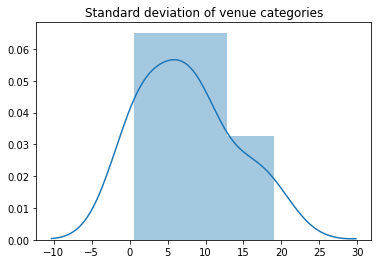

In [7]:
# Plot the distribution of standard deviations to get a feel four how varied the data is
sns.distplot(numerical_data.std())
plt.title('Standard deviation of venue categories')
numerical_data.std().describe()

We can see above that the data is quite varied between venue cateogies, this should hopefully lead to more interesting clusters.

In [8]:
numerical_data.std()

Parks                    8.198889
Museum                   8.360755
Library                  2.955994
Public Bathroom          1.039541
Post Office              4.486539
Travel & Transport      15.577039
Hospital                 7.618949
School                   8.959080
Bookstore                6.974608
Gym / Fitness Center    16.865574
Farm                     0.553581
Bar                     18.985961
Place of Worship        10.811387
ATM                      0.545325
Casino                   0.906962
dtype: float64

### Visualisation techniques

#### t-SNE
First off I'm going to try to visualise the data in 2 dimensions by using t-SNE. <br>
t-SNE is a statistical dimensionality reduction technique which seeks to represent the data such that similar points are more likely to be together in low-dimensional space, and that disimilar points are more likely to be further apart in low-dimensionality space.

In [9]:
from sklearn.manifold import TSNE

tsne_pipe = make_pipeline(
    StandardScaler()
    ,TSNE(learning_rate = 200, random_state = 42)
)

tsne_features = tsne_pipe.fit_transform(numerical_data)

In [10]:
tsne_xs = tsne_features[:,0]
tsne_ys = tsne_features[:,1]

Text(0.5, 1.0, 't-SNE for venue categories')

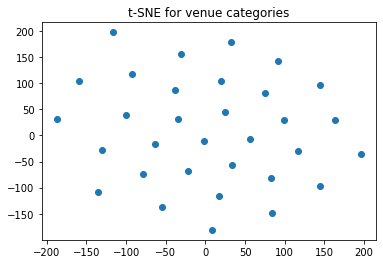

In [11]:
plt.scatter(tsne_xs, tsne_ys)
plt.title('t-SNE for venue categories')

We see here that t-SNE does a poor job at splitting out the data into recognisable. <br>
Next we will apply a more recongised, non-statistical technique: Principal Component Analysis.

### PCA

Principal Component Analysis is a dimensionality reduction technique which seeks to find lower dimensional representations of higher dimensional data (called Principal Components) which explain the variability of the original dataset.

In [12]:
# Set up PCA pipeline, it's important to scale beforehand
from sklearn.decomposition import PCA
pca_pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components=3)
)

pca_features = pca_pipe.fit_transform(numerical_data)

In [13]:
# Extract the three principal components
pca_xs = pca_features[:,0]
pca_ys = pca_features[:,1]
pca_zs = pca_features[:,2]

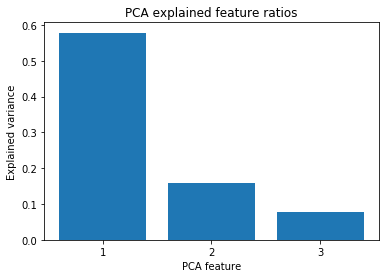

0.8134542158734652

In [14]:
# Plot explained feature ratio
features = range(1, pca_pipe.named_steps.pca.n_components + 1)
plt.bar(features, pca_pipe.named_steps.pca.explained_variance_ratio_)
plt.title('PCA explained feature ratios')
plt.xlabel('PCA feature')
plt.ylabel('Explained variance')
plt.xticks(features)
plt.show()

sum(pca_pipe.named_steps.pca.explained_variance_ratio_)

We see above that the three PCA features explain 78% of the variability of the data. <br>
I believe that the 3D representation of the data post-PCA is sufficiently representative.

Let's visualise out data post-PCA in both 3 and 2 dimensions.

Text(0.5, 0.92, 'PCA for venue categories')

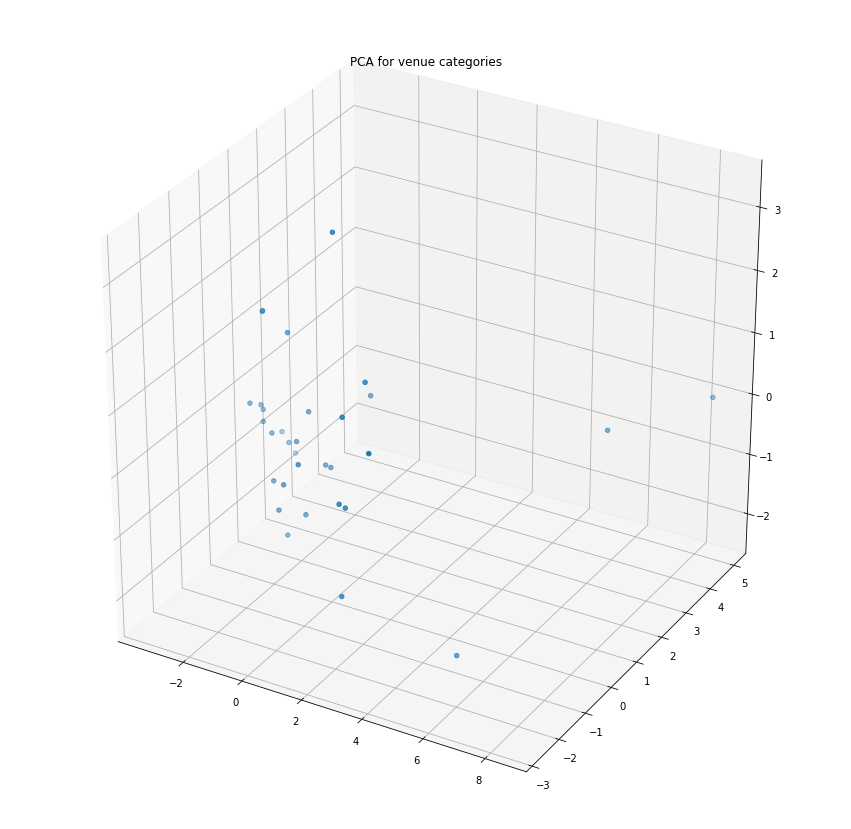

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_xs, pca_ys, pca_zs)
plt.title('PCA for venue categories')

Text(0.5, 1.0, 'PCA for venue categories')

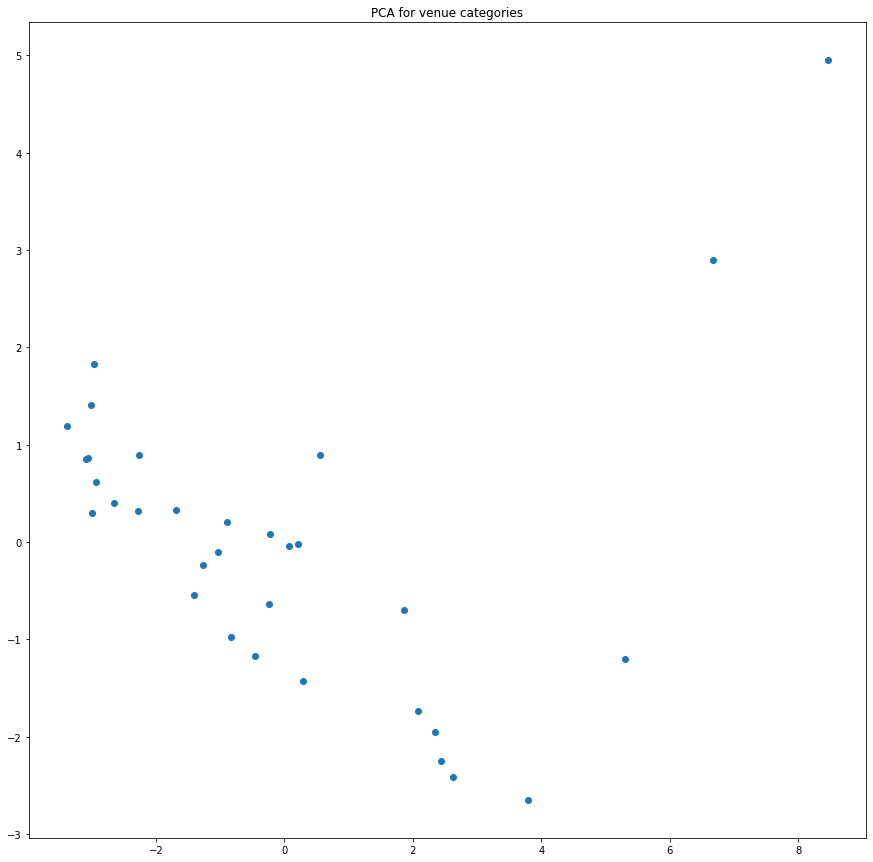

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111)
ax.scatter(pca_xs, pca_ys)
plt.title('PCA for venue categories')

Below we see a visualisation of the Principal Components, this heatmap shows the correlation between the high-dimensional features (x-axis) and the low-dimensional principal components (y-axis).

It's clear from this that venue categories such as Farms and ATMs contribute less to the most important principal component (PC1).

Text(0.5, 1.0, 'Visualising PCA Components')

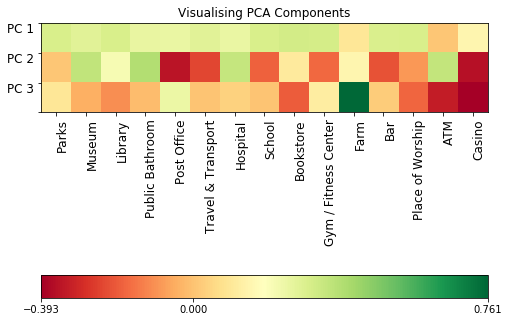

In [17]:
pca_components = pca_pipe.named_steps['pca'].components_

fig = plt.figure(figsize=(8, 12))
plt.imshow(pca_components, interpolation = 'none', cmap = 'RdYlGn')
feature_names = list(numerical_data.columns)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(-0.5, 3));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['PC ' + str(x) for x in list(range(1, 4))], va='top', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca_components.min(), 0, pca_components.max()], pad=0.25);

plt.title ('Visualising PCA Components')

## Clustering Data

I'll now use K-Means to cluster the data.
Now I'm defining a function to help me choose the optimal number of clusters. <br>
It does so by trying different values of k and plotting the resulting inertia.

In [18]:
# User-defined function to try different values of k (number of clusters) then plot the resulting inertia
def elbow_method(data, any_pipeline, selection = None):
    elbow = any_pipeline
    sse = {}
    for k in range(1, 10):
        elbow.named_steps.kmeans.n_clusters = k
        elbow.fit(data)
        sse[k] = elbow.named_steps.kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    fig, ax = plt.subplots(figsize = (16, 9))
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.title('The Elbow Method for n_cluster selection')
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    if selection != None:
        plt.axvline(selection, color='red', linewidth=4)
    plt.show()

In [19]:
df.head()

,Unnamed: 0,London Borough,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino
0,0,Barking and Dagenham,51.554117,0.150504,3,0,1,0,1,9,0,9,0,4,0,3,6,2,0
1,1,Barnet,51.648784,-0.172913,4,0,0,0,3,15,0,2,0,7,0,7,5,0,0
2,2,Bexley,51.441679,0.150488,1,1,1,0,0,3,0,1,0,0,1,8,3,0,0
3,3,Brent,51.584778,-0.299180,4,0,1,0,1,16,0,8,1,4,0,5,11,0,0
4,4,Bromley,51.402805,0.014814,7,0,1,0,3,31,0,5,6,9,0,22,13,1,2


### K Means

### Pipeline

In [20]:
# Define steps in pipeline
# Create the pipeline
k_means = make_pipeline(
    StandardScaler()
    ,KMeans(n_clusters=3, random_state = 42)
)

As seen below, I believe that 5 is a good number of clusters to select.

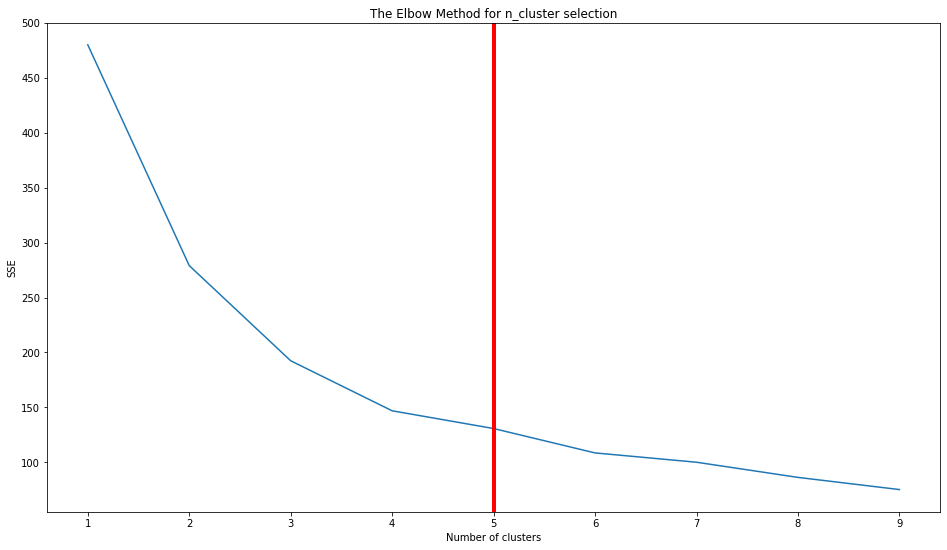

In [21]:
elbow_method(data = numerical_data, any_pipeline=k_means, selection = 5)

In [22]:
# Setting the number of clusters to 5
k_means.named_steps.kmeans.n_clusters = 5

In [23]:
# Fit model and Predict labels
k_means_labels = k_means.fit_predict(numerical_data)

In [24]:
# Define new data structures with labels 
numerical_data_labelled = numerical_data.copy()
numerical_data_labelled.loc[:,'labels'] = k_means_labels

Below I'm creating a new dataframe with all my data with the new cluster labels.

In [25]:
df_k_means = pd.concat([df, numerical_data_labelled.loc[:,'labels']], axis = 'columns')
df_k_means = df_k_means.set_index('London Borough')
del df_k_means['Unnamed: 0']
df_k_means

,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino,labels
London Borough,,,,,,,,,,,,,,,,,,
Barking and Dagenham,51.554117,0.150504,3,0,1,0,1,9,0,9,0,4,0,3,6,2,0,0
Barnet,51.648784,-0.172913,4,0,0,0,3,15,0,2,0,7,0,7,5,0,0,0
Bexley,51.441679,0.150488,1,1,1,0,0,3,0,1,0,0,1,8,3,0,0,0
Brent,51.584778,-0.299180,4,0,1,0,1,16,0,8,1,4,0,5,11,0,0,0
Bromley,51.402805,0.014814,7,0,1,0,3,31,0,5,6,9,0,22,13,1,2,3
Camden,51.542305,-0.139560,16,6,4,0,13,45,2,25,10,41,0,50,20,0,1,4
Croydon,51.371305,-0.101957,5,2,1,0,5,45,1,15,6,14,0,50,11,1,1,3
Ealing,51.512655,-0.305195,11,0,1,0,10,47,1,19,5,17,0,32,25,0,0,4
Enfield,51.652085,-0.081017,4,2,1,0,3,21,0,6,3,6,0,13,8,1,0,0


Text(0.5, 1.0, 'K Means Clustering of London Boroughs')

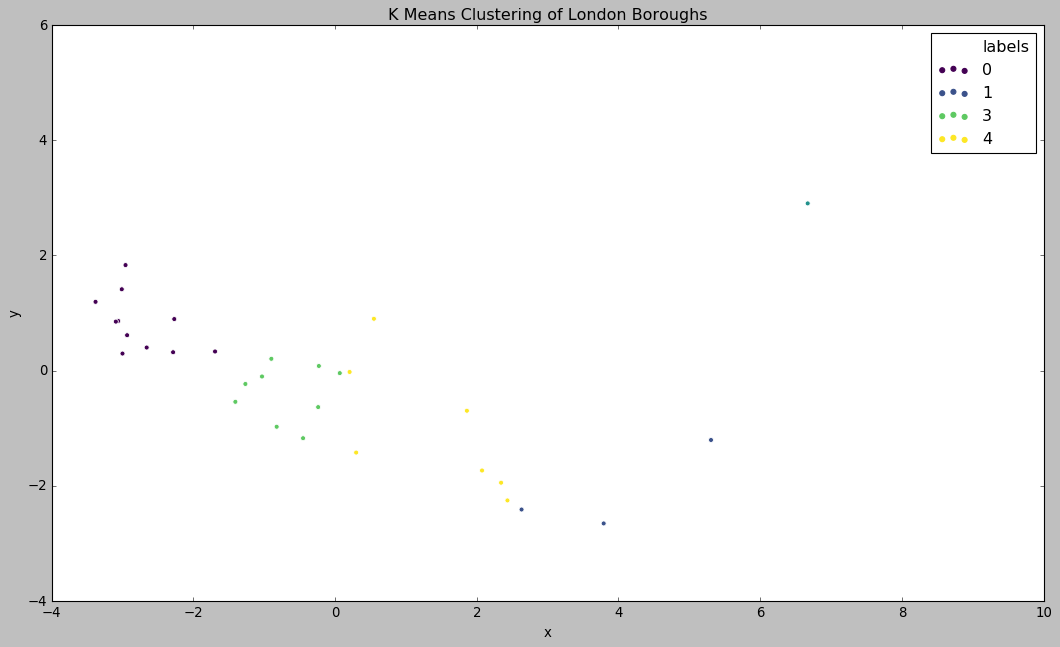

In [108]:
pca_k_means = pd.DataFrame(data = {'x': pca_xs, 'y': pca_ys, 'labels': k_means_labels})
pca_k_means['labels'] = pca_k_means['labels']#.astype(int)
plt.figure(figsize=(16, 9))
sns.scatterplot('x', 'y', data = pca_k_means, hue = 'labels', palette = 'viridis').set_title('K Means Clustering of London Boroughs')


As you can see above, the KMeans algoirthm is quite good at picking up distinct clusters, although cluster 4 is quite distinct, inter-cluster and intra-cluster.



## Hierarchical Clustering


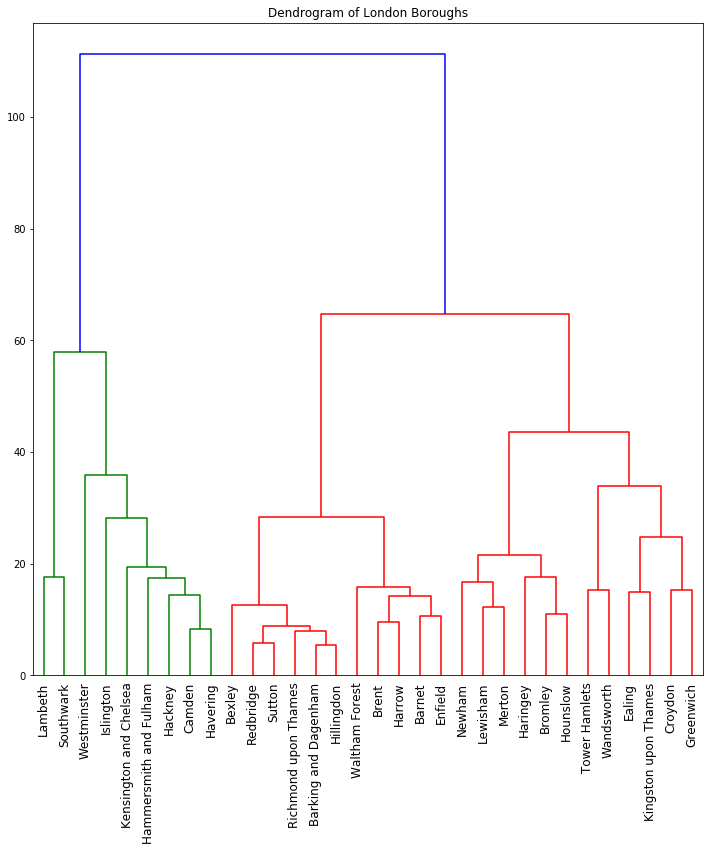

In [94]:
# Perform the necessary imports

from scipy.cluster.hierarchy import linkage, dendrogram

df_k_means
 
# Calculate the linkage: mergings
mergings = linkage(df_k_means, method = 'complete')
 
plt.figure(figsize=(12, 12))
plt.title('Dendrogram of London Boroughs')
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=df_k_means.index,
           leaf_rotation=90,
           truncate_mode = 'level',
           p=10,
           leaf_font_size = 12
)
plt.show()

## Exploring the clusters

In [27]:
df_k_means.head()

,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino,labels
London Borough,,,,,,,,,,,,,,,,,,
Barking and Dagenham,51.554117,0.150504,3,0,1,0,1,9,0,9,0,4,0,3,6,2,0,0
Barnet,51.648784,-0.172913,4,0,0,0,3,15,0,2,0,7,0,7,5,0,0,0
Bexley,51.441679,0.150488,1,1,1,0,0,3,0,1,0,0,1,8,3,0,0,0
Brent,51.584778,-0.299180,4,0,1,0,1,16,0,8,1,4,0,5,11,0,0,0
Bromley,51.402805,0.014814,7,0,1,0,3,31,0,5,6,9,0,22,13,1,2,3


In [28]:
df_k_means['labels'].value_counts()

0    11
3     9
4     7
1     3
2     2
Name: labels, dtype: int64

In [85]:
for label in np.sort(df_k_means['labels'].unique()):
    print(f'Label {label}')
    print(df_k_means.reset_index().groupby('labels')['London Borough'].unique()[label])

Label 0
['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Enfield' 'Harrow'
 'Hillingdon' 'Redbridge' 'Richmond upon Thames' 'Sutton' 'Waltham Forest']
Label 1
['Islington' 'Kensington and Chelsea' 'Westminster']
Label 2
['Lambeth' 'Southwark']
Label 3
['Bromley' 'Croydon' 'Haringey' 'Hounslow' 'Kingston upon Thames'
 'Lewisham' 'Merton' 'Newham' 'Wandsworth']
Label 4
['Camden' 'Ealing' 'Greenwich' 'Hackney' 'Hammersmith and Fulham'
 'Havering' 'Tower Hamlets']


In [29]:
df_k_means.groupby('labels').mean()

,Latitude,Longitude,Parks,Museum,Library,Public Bathroom,Post Office,Travel & Transport,Hospital,School,Bookstore,Gym / Fitness Center,Farm,Bar,Place of Worship,ATM,Casino
labels,,,,,,,,,,,,,,,,,
0,51.541077,-0.134540,4.454545,0.636364,1.090909,0.000000,1.545455,12.909091,0.000000,4.909091,0.636364,4.000000,0.272727,6.363636,8.181818,0.363636,0.000000
1,51.511581,-0.145392,22.000000,7.333333,6.000000,0.666667,11.000000,47.666667,1.000000,25.333333,14.000000,45.666667,0.333333,50.000000,34.333333,0.000000,2.666667
2,51.502112,-0.110372,29.500000,32.500000,11.000000,4.000000,8.500000,49.500000,30.500000,26.000000,24.000000,47.000000,1.000000,50.000000,37.500000,1.000000,0.500000
3,51.455616,-0.135815,7.555556,0.444444,1.555556,0.111111,4.333333,37.888889,2.222222,10.333333,4.333333,14.000000,0.111111,24.333333,17.555556,0.444444,0.888889
4,51.516093,-0.125478,11.428571,4.428571,2.857143,0.142857,10.000000,44.857143,3.428571,20.857143,6.857143,31.571429,0.714286,43.142857,20.428571,0.142857,0.428571


Below we see the shape of the mean number of venues per category by cluster label. <br>
Although this graph is quite confusing to navigate, the main point to show is that the clusters are different. <br>
This is shown due to the different mean scores of each cluster.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


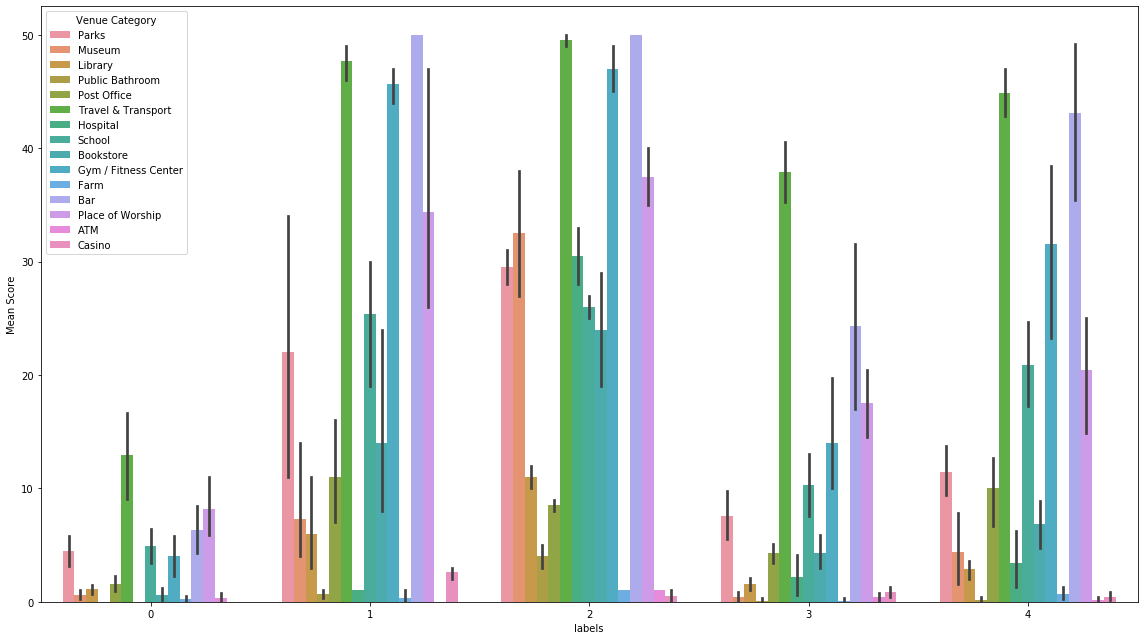

In [30]:
plt.figure(figsize=(16, 9))
sns.barplot(y='Mean Score', x='labels', hue='Venue Category', data = df_k_means.melt(value_vars = df_k_means.columns[2:-1], id_vars = 'labels', var_name = 'Venue Category', value_name = 'Mean Score'))
plt.tight_layout()

A cleaner way of showing this would be a pair plot which I have done below. <br>
Some zooming in is required.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


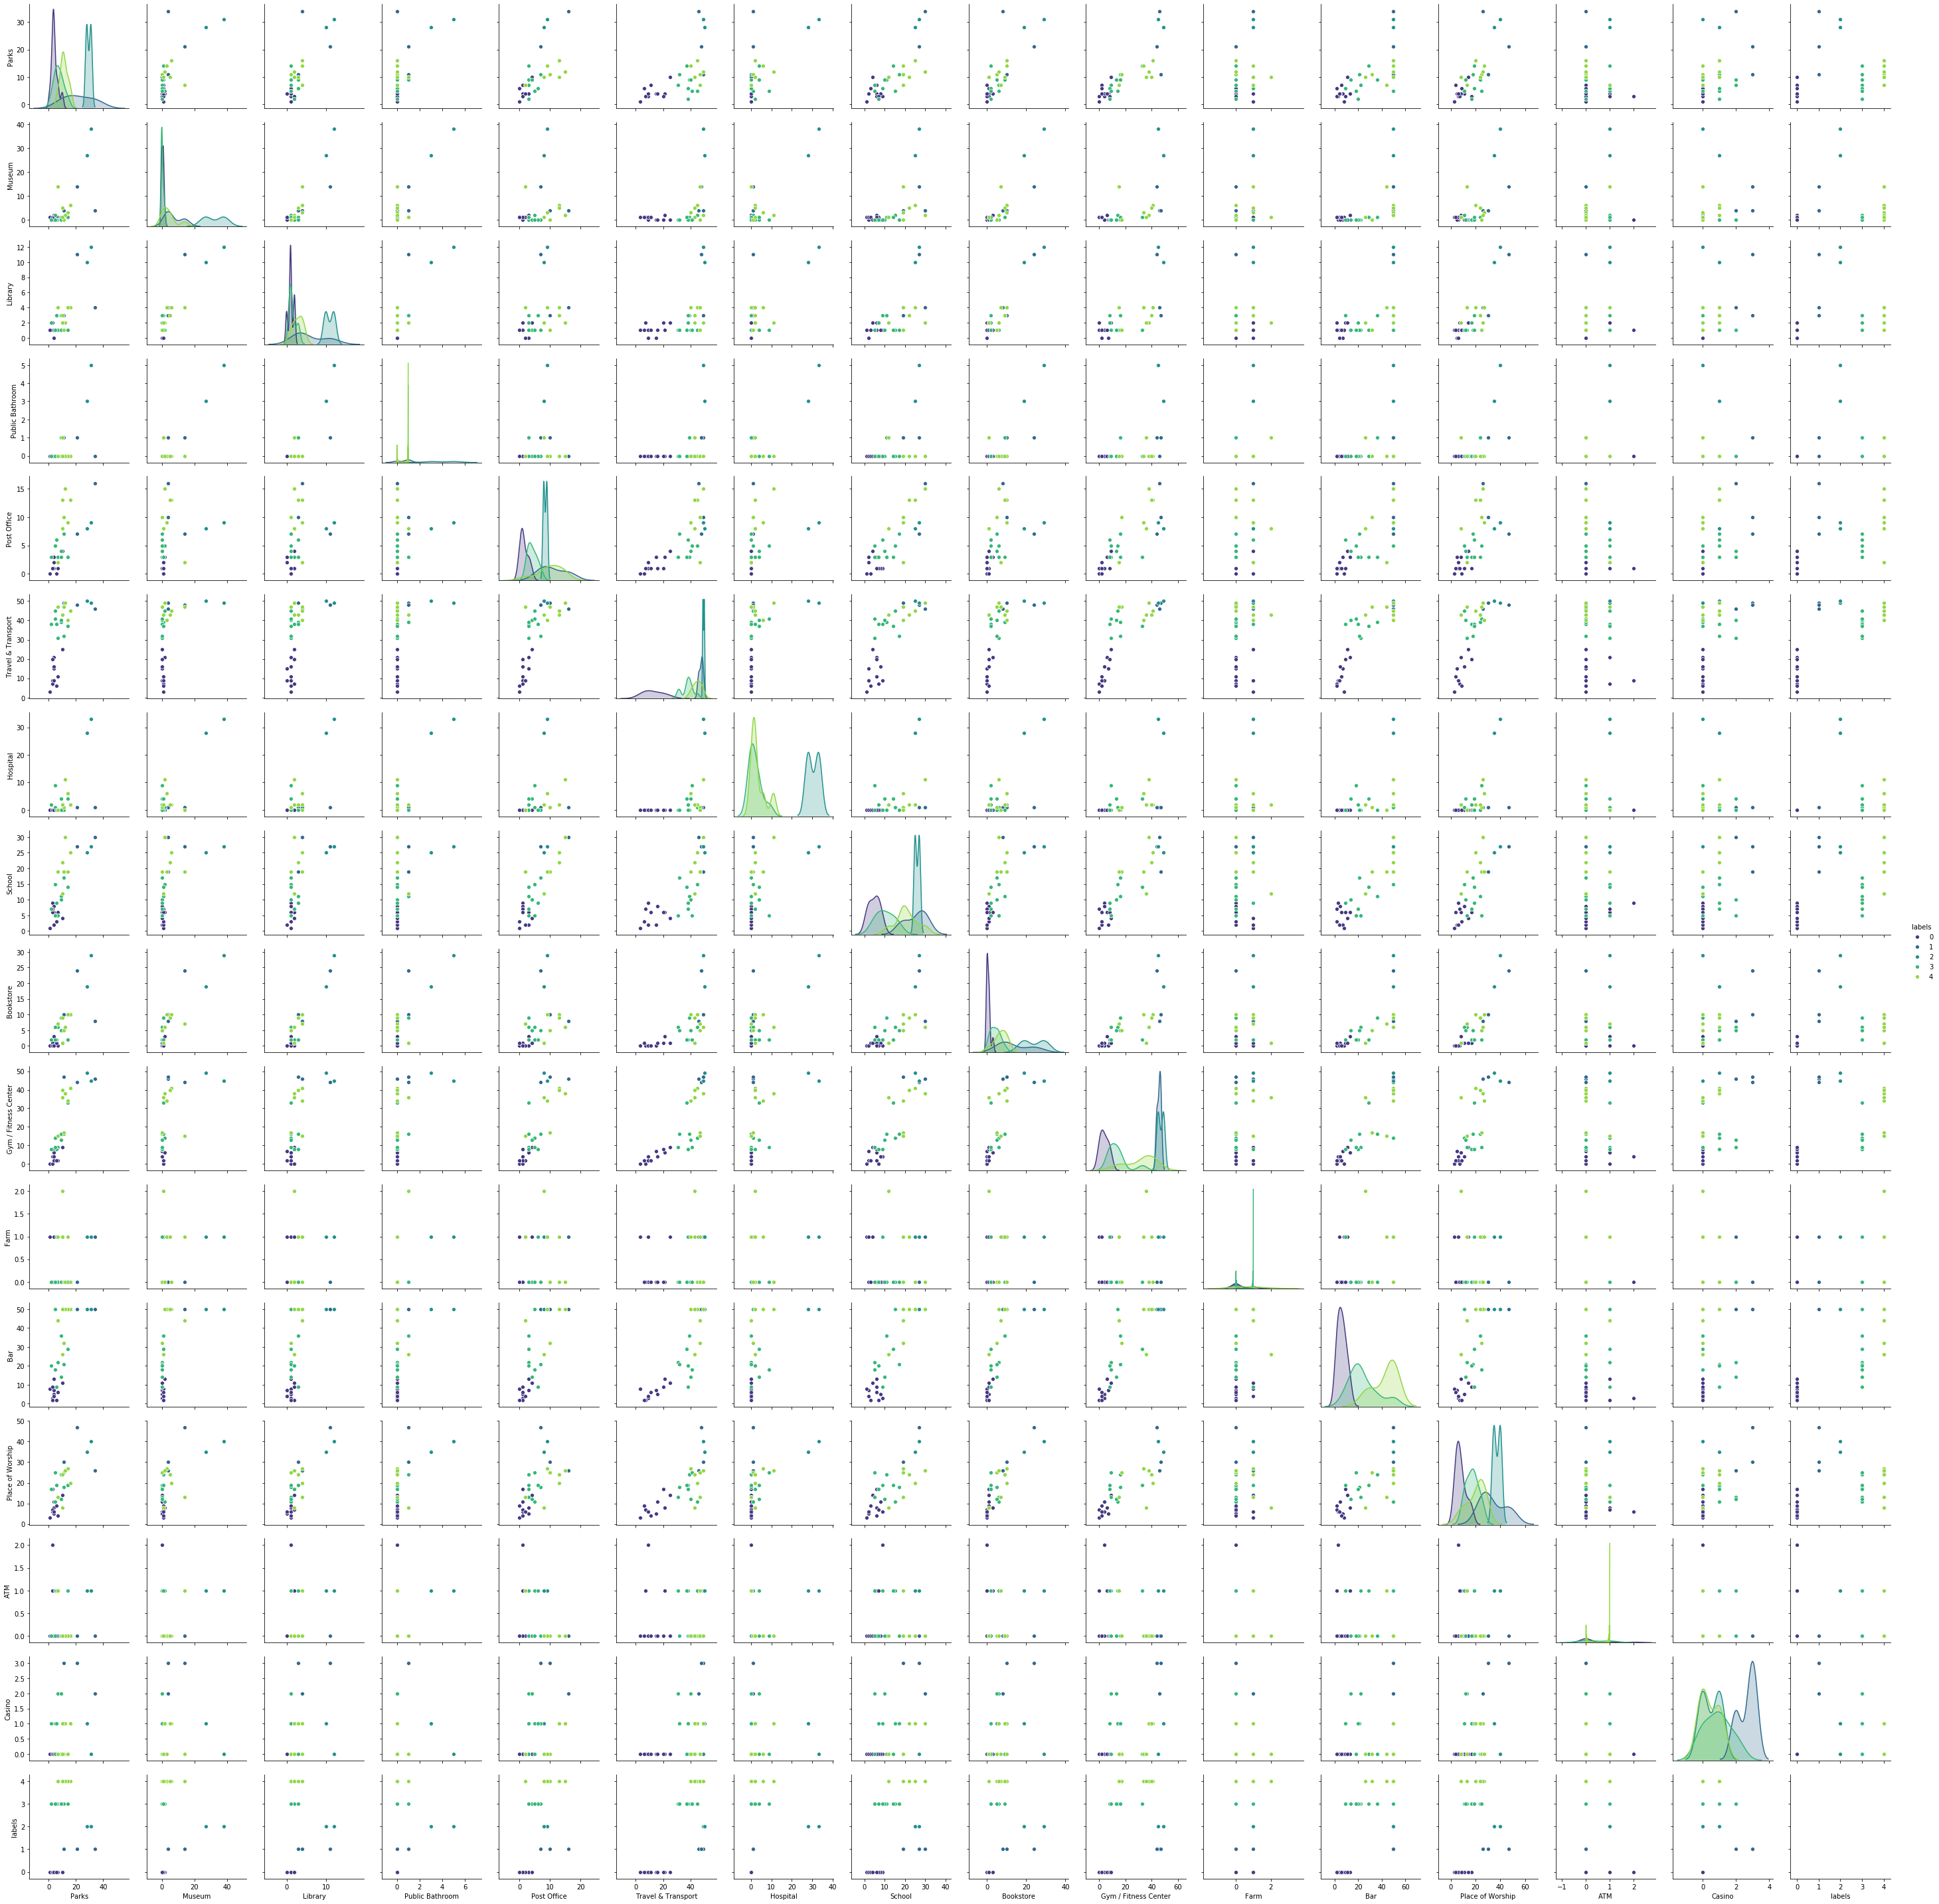

In [65]:
sns.pairplot(df_k_means.iloc[:,2:], hue = 'labels', palette = 'viridis')

In [31]:
# Setting up the initial centre of the map
latitude, longitude = 51.5074, 0

In [95]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(df_k_means['labels'].max(), dtype = int)
ys = [i + x + (i*x)**2 for i in range(df_k_means['labels'].max() + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_k_means['Latitude'], df_k_means['Longitude'], df_k_means.index, df_k_means['labels']):
    label = folium.Popup(f"{poi} - Cluster {cluster}", parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [97]:
map_clusters

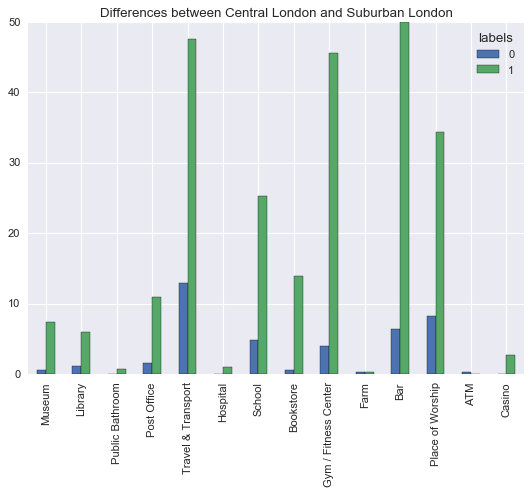

In [133]:
title = 'Differences between Central London and Suburban London'
df_k_means.iloc[:,3:][df_k_means['labels'].isin([0, 1])].groupby('labels').mean().T.plot(kind='bar', title = title)